In [1]:
import numpy as np
import pandas as pd
telco= pd.read_csv('Churn.csv')
print(telco.head())
#EDA
print(telco.groupby(['Churn']).mean())
print(telco.groupby(['Churn']).std())
print(telco.groupby('State')['Churn'].value_counts())

   Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  Intl_Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ_Calls Churn Intl_Plan Vmail_Plan  ...  Day_Charge  Eve_Calls  \
0               1    no        no        yes  ...       45.07         99   
1               1    no        no        yes  ...       27.47        103   
2               0    no        no         no  ...       41.38        110   
3               2    no       yes         no  ...       50.90         88   
4               3    no       yes         no  ...       28.34        122   

   Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  S

In [2]:
telco.shape

(3333, 21)

In [3]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

In [4]:
telco.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

In [5]:
#Note: All of these features appear to be well approximated by the normal distribution. 
#If this were not the case, we would have to consider applying a feature transformation of some kind.

In [6]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Day_Mins'
sns.distplot(telco['Day_Mins'])

# Display the plot
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 640x480 with 1 Axes>

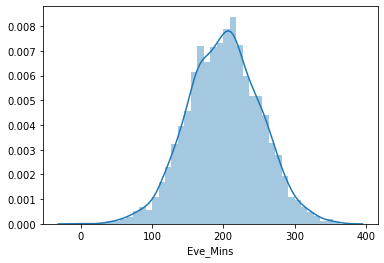

In [7]:
# Visualize the distribution of 'Eve_Mins'
sns.distplot(telco['Eve_Mins'])

# Display the plot
plt.show()

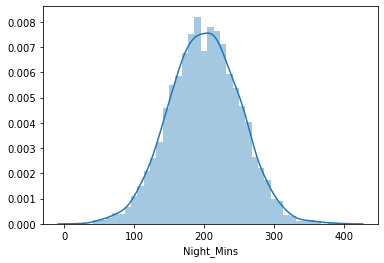

In [8]:
# Visualize the distribution of 'Night_Mins'
sns.distplot(telco['Night_Mins'])

# Display the plot
plt.show()

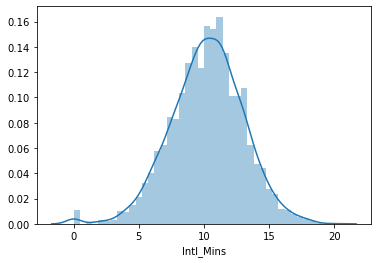

In [9]:
# Visualize the distribution of 'Intl_Mins'
sns.distplot(telco['Intl_Mins'])

# Display the plot
plt.show()

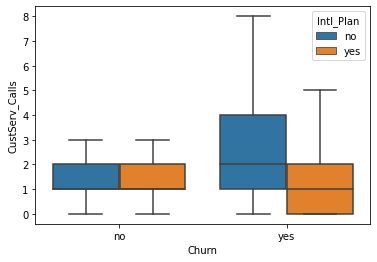

In [10]:
# Create the box plot
#Removed Outliers by adding sym
#  hue parameter used to specify the third variable.
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")


# Display the plot
plt.show()

In [11]:
#There are some very interesting insights here. It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls. This type of information is really useful in better understanding the drivers of churn. It's now time to learn about how to preprocess your data prior to modeling.

# Data Preparation

In [12]:
#Identifying features to convert
#Churn, Vmail_Plan, and Intl_Plan, in particular, are binary features that can easily be converted into 0s and 1s. 
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no': 0 , 'yes': 1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no': 0 , 'yes': 1})

telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no': 0 , 'yes': 1})

# Print the results to verify
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())
print(telco['Intl_Plan'].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64
0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64


In [13]:

# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'])
print(telco_state)

      AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  WA  \
0      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
3328   0   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3329   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3330   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3331   0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
3332   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   

      WI  WV  WY  
0      0

In [14]:
# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'])

# Print the head of telco_state
print(telco_state.head())
telco['State']=telco_state

   AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  WA  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   WI  WV  WY  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 51 columns]


In [15]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn               int64
Intl_Plan           int64
Vmail_Plan          int64
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State               uint8
Area_Code           int64
Phone              object
dtype: object

In [16]:
#This creates an entirely new DataFrame. It can be merged to original telco DataFrame, now we should consider dropping any that are unnecessary.

In [17]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,0,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,0,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,0,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,0,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,0,415,330-6626


In [18]:
#Drop the unnecessary features
telco = telco.drop(['Area_Code', 'Phone' ], axis=1)
print(telco)

      Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  \
0                128             25     265.1     197.4       244.7   
1                107             26     161.6     195.5       254.4   
2                137              0     243.4     121.2       162.6   
3                 84              0     299.4      61.9       196.9   
4                 75              0     166.7     148.3       186.9   
...              ...            ...       ...       ...         ...   
3328             192             36     156.2     215.5       279.1   
3329              68              0     231.1     153.4       191.3   
3330              28              0     180.8     288.8       191.9   
3331             184              0     213.8     159.6       139.2   
3332              74             25     234.4     265.9       241.4   

      Intl_Mins  CustServ_Calls  Churn  Intl_Plan  Vmail_Plan  Day_Calls  \
0          10.0               1      0          0           1        11

In [19]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
telco.head()
# Scale telco using StandardScaler
telco_scaled = StandardScaler().fit_transform(telco)

print(telco_scaled)

# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled)
#telco_scaled_df = pd.DataFrame(telco_scaled, columns=['Intl_Calls', 'Night_Mins'])

# Print summary statistics
print(telco_scaled_df.describe())



[[ 0.67648946  1.23488274  1.56676695 ... -0.60119509 -0.0856905
  -0.12589212]
 [ 0.14906505  1.30794844 -0.33373776 ... -0.60119509  1.2411686
  -0.12589212]
 [ 0.9025285  -0.59175986  1.16830364 ...  0.21153386  0.69715637
  -0.12589212]
 ...
 [-1.83505538 -0.59175986  0.01881963 ...  0.61789834  1.3871231
  -0.12589212]
 [ 2.08295458 -0.59175986  0.62477766 ...  2.24335625 -1.87695028
  -0.12589212]
 [-0.67974475  1.23488274  1.00304237 ... -0.19483061  1.2411686
  -0.12589212]]
                 0             1             2             3             4   \
count  3.333000e+03  3.333000e+03  3.333000e+03  3.333000e+03  3.333000e+03   
mean   1.713134e-16  3.832651e-16  7.081711e-16 -1.067919e-16  6.602046e-17   
std    1.000150e+00  1.000150e+00  1.000150e+00  1.000150e+00  1.000150e+00   
min   -2.513172e+00 -5.917599e-01 -3.301096e+00 -3.963622e+00 -3.513648e+00   
25%   -6.797448e-01 -5.917599e-01 -6.624241e-01 -6.780300e-01 -6.698545e-01   
50%   -1.627644e-03 -5.917599e-01 -6.8

In [20]:
# Verify dropped features
print(telco.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')


In [21]:
# Create the new feature
telco['Avg_Night_Calls'] = telco['Night_Mins']/telco['Night_Calls']

# Print the first five rows of 'Avg_Night_Calls'
print(telco['Avg_Night_Calls'].head(5))

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


In [22]:
telco1=telco.drop(['Churn' ], axis=1)
print(telco1)
#telco2= telco1.iloc[1]
#print(telco2)

      Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  \
0                128             25     265.1     197.4       244.7   
1                107             26     161.6     195.5       254.4   
2                137              0     243.4     121.2       162.6   
3                 84              0     299.4      61.9       196.9   
4                 75              0     166.7     148.3       186.9   
...              ...            ...       ...       ...         ...   
3328             192             36     156.2     215.5       279.1   
3329              68              0     231.1     153.4       191.3   
3330              28              0     180.8     288.8       191.9   
3331             184              0     213.8     159.6       139.2   
3332              74             25     234.4     265.9       241.4   

      Intl_Mins  CustServ_Calls  Intl_Plan  Vmail_Plan  Day_Calls  Day_Charge  \
0          10.0               1          0           1        110 

In [23]:
# Import LogisticRegression


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Instantiate the classifier
clf= LogisticRegression()
# Fit the classifier
clf.fit(telco1, telco['Churn'])
# Predict the label of new_customer
print(clf.predict(telco1))

[0 0 0 ... 0 0 0]


C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf= DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco1, telco['Churn'])

# Predict the label of new_customer
print(clf.predict(telco1))

[0 0 0 ... 0 0 0]


In [25]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [26]:
# Create feature variable
X = telco.drop('Churn', axis=1)
# Create target variable
y = telco['Churn']

In [27]:
# Create training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)

In [28]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.952


In [29]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
y_pred=clf.predict(X_test)
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[851   5]
 [ 43 101]]


In [30]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [31]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test,y_pred))

[[562   6]
 [ 28  71]]


In [32]:

# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import precision_score
from sklearn.metrics import precision_score
# Print the precision
print(precision_score(y_test, y_pred))

0.9705882352941176


In [33]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, y_pred))

0.68


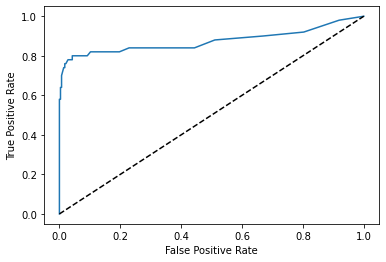

In [34]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr,tpr)
# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [35]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))
#This indicates that this baseline random forest classifier is quite good!

0.874612676056338


In [36]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test, y_pred))

0.8
